[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\antre\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\antre\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\antre\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\antre\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\antre\AppData\Roaming\nltk_data...
[nltk_data]    | 

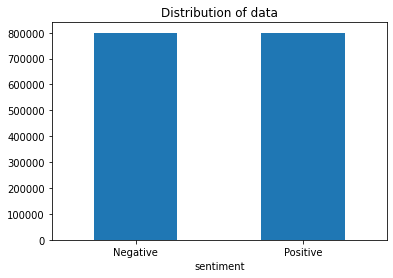

In [1]:
from emojis_stopwords_def import *
from preprocessing import preprocess
from save_models import save_model
from load_models import load_model
from prediction import predict
# time

import time
# utilities

import numpy as np  
import pandas as pd
# plotting

import seaborn as sns
import matplotlib.pyplot as plt
# sklearn

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
# For evaluation

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# -------------------------------------- DATA COLLECTION ---------------------------------------------- #

ENCODING_DATA ="ISO-8859-1"
COLUMN_NAMES = ["sentiment", "ids", "date", "flag", "user", "text"]
dataset = pd.read_csv(r"../Dataset_2.csv", encoding=ENCODING_DATA, names=COLUMN_NAMES)
# Choose only the columns we want to use

dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding

dataset['sentiment'] = dataset['sentiment'].replace(4,1)
# Plotting the distribution for dataset (Negative: Sentiment = 0, Positive: Sentiment = 4)

ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.

text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [2]:
t = time.time()
# Processed Dataset

processedtext = preprocess(text)   
print(f"Text Preprocessing complete.")
print(f"Time Taken: {round(time.time()-t)} seconds \n")

Text Preprocessing complete.
Time Taken: 194 seconds 



In [3]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.05, random_state = 0)
print(f'Data Split Complete.')

Data Split Complete.


In [4]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('Number of feature words: ', len(vectoriser.get_feature_names()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformation to Vectors Completed. \n')

Vectoriser fitted.


C:\Users\antre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of feature words:  500000
Data Transformation to Vectors Completed. 



              precision    recall  f1-score   support

           0       0.79      0.74      0.76     39989
           1       0.75      0.80      0.78     40011

    accuracy                           0.77     80000
   macro avg       0.77      0.77      0.77     80000
weighted avg       0.77      0.77      0.77     80000



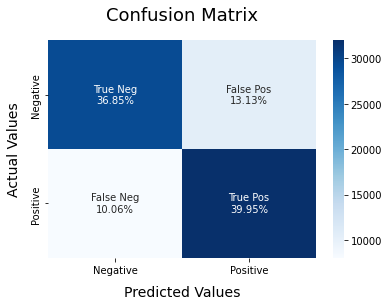

Model Accuracy : 0.76805
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     39989
           1       0.81      0.80      0.81     40011

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



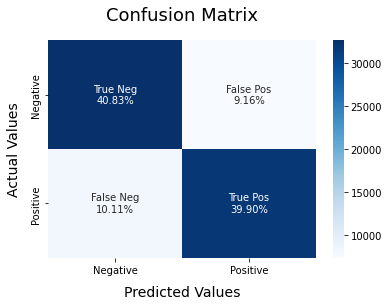

Model Accuracy : 0.807325
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     39989
           1       0.81      0.83      0.82     40011

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



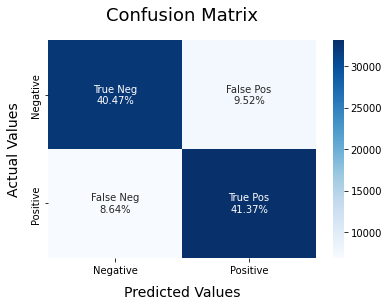

Model Accuracy : 0.8184375
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



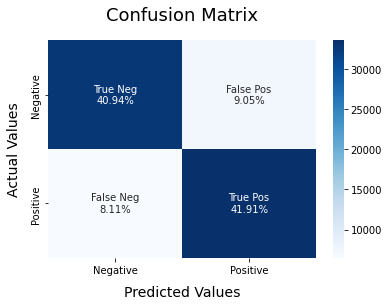

Model Accuracy : 0.82845


In [5]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted Values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual Values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()
    print('Model Accuracy :',accuracy_score(y_test,y_pred))
# XGBoost Classifier

xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb_clf.fit(X_train,y_train)
model_Evaluate(xgb_clf)
# Naive Bayes Classifier

nb_clf = MultinomialNB()
nb_clf.fit(X_train,y_train)
model_Evaluate(nb_clf)
# SVM Classifier

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
# Logistic Regrassion

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

In [6]:
vectoriserFilename ="Vectoriser"
lrFilename = "LogisticRegression"
svcFilename = "LinearSVC"
nbFilename = "MultinomialNB"
xgbFilename = "XGBClassifier"
save_model(vectoriser, vectoriserFilename)
save_model(LRmodel, lrFilename)
save_model(SVCmodel, svcFilename)
save_model(nb_clf, nbFilename)
save_model(xgb_clf, xgbFilename)

In [7]:
if __name__=="__main__": 
    # Loading the models
    vectoriser, xgb_clf = load_model(vectoriserFilename, xgbFilename)
    vectoriser, nb_clf = load_model(vectoriserFilename, nbFilename)
    vectoriser, SVCmodel = load_model(vectoriserFilename, svcFilename)
    vectoriser, LRmodel = load_model(vectoriserFilename, lrFilename)
    print(f'\n Tweets Sentiment Prediction')
    # Text to classify
    text = ["The weather is good today",
            "I don't like the weather today"]
    # Prediction 
    df1 = predict(vectoriser, xgb_clf, text)
    print(df1.head())   
    df2 = predict(vectoriser, nb_clf, text)
    print(df2.head())
    df3 = predict(vectoriser, SVCmodel, text)
    print(df3.head())
    df4 = predict(vectoriser, LRmodel, text)
    print(df4.head())


 Tweets Sentiment Prediction
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative


In [10]:
if __name__=="__main__": 
    # Loading the models
    vectoriser, xgb_clf = load_model(vectoriserFilename, xgbFilename)
    vectoriser, nb_clf = load_model(vectoriserFilename, nbFilename)
    vectoriser, SVCmodel = load_model(vectoriserFilename, svcFilename)
    vectoriser, LRmodel = load_model(vectoriserFilename, lrFilename)
    print(f'\n Tweets Sentiment Prediction')
    # Text to classify
    text = ["The weather is good today",
            "I don't like the weather today",
            "I like you"]
    # Prediction 
    df1 = predict(vectoriser, xgb_clf, text)
    print(df1.head())   
    df2 = predict(vectoriser, nb_clf, text)
    print(df2.head())
    df3 = predict(vectoriser, SVCmodel, text)
    print(df3.head())
    df4 = predict(vectoriser, LRmodel, text)
    print(df4.head())


 Tweets Sentiment Prediction
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
2                      I like you  Positive
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
2                      I like you  Positive
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
2                      I like you  Positive
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
2                      I like you  Positive


In [11]:
df1 = predict(vectoriser, xgb_clf, text)
print(df1.head())   
df2 = predict(vectoriser, nb_clf, text)
print(df2.head())
df3 = predict(vectoriser, SVCmodel, text)
print(df3.head())
df4 = predict(vectoriser, LRmodel, text)
print(df4.head())

                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
2                      I like you  Positive
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
2                      I like you  Positive
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
2                      I like you  Positive
                             text sentiment
0       The weather is good today  Positive
1  I don't like the weather today  Negative
2                      I like you  Positive
